In [1]:
import os
#os.environ['DEVICE_ID'] = '0'
import numpy as np

import mindspore as ms
from mindspore import nn
from mindspore import context
#当前实验选择算力为Ascend，如果在本地体验，参数device_target设置为"CPU”

context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

In [2]:
x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x +  0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

In [3]:
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

In [7]:
for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 19, loss is 3.7629876


In [8]:
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -5.016057968139648 * x + -0.26624059677124023
x = -10, predicted y = [[49.89434]]
x = -5, predicted y = [[24.814049]]
x = 0, predicted y = [[-0.2662406]]
x = 5, predicted y = [[-25.34653]]
x = 10, predicted y = [[-50.42682]]


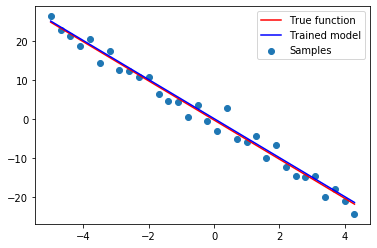

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, -5 * x +  0.1, c='b', label='Trained model')
plt.legend()